<a href="https://colab.research.google.com/github/2303A52441/AI-ML/blob/main/lab08_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline
fetch_openml(data_id=5).keys

<function Bunch.keys>

In [2]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car', version=2,parser='auto')

In [3]:
type(car_data)

sklearn.utils._bunch.Bunch

In [4]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
car_data.feature_names, car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [6]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [8]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [11]:
import pandas as pd
from sklearn.utils import Bunch

# Assuming 'car_data' is your Bunch object
car_df = pd.DataFrame(car_data.data, columns=car_data.feature_names)  # Create DataFrame

car_df['target'] = car_data.target  # Add target column if needed

car_df.head() # Now you can use head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [12]:
type(car_data)

sklearn.utils._bunch.Bunch

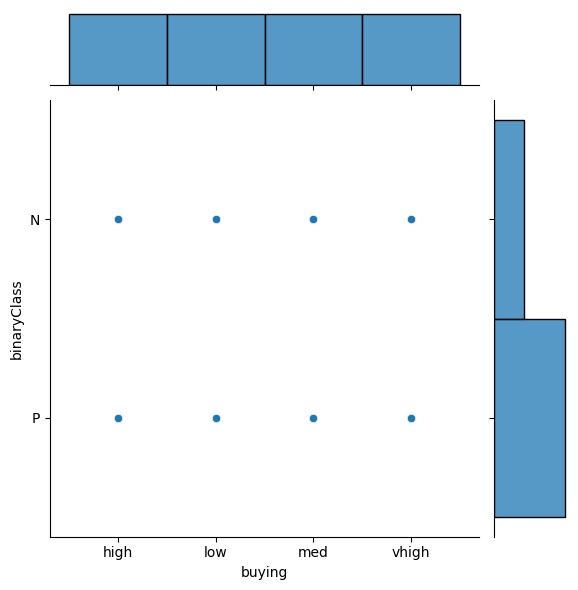

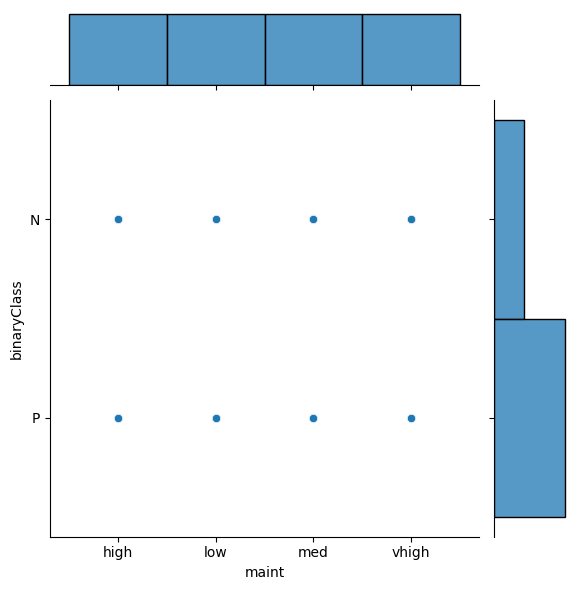

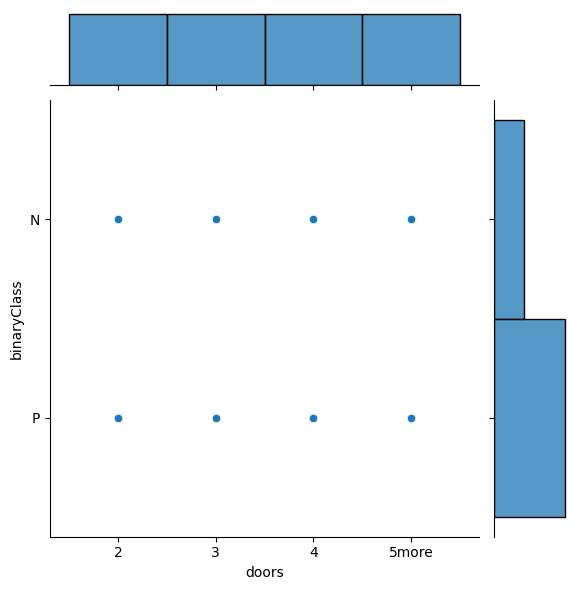

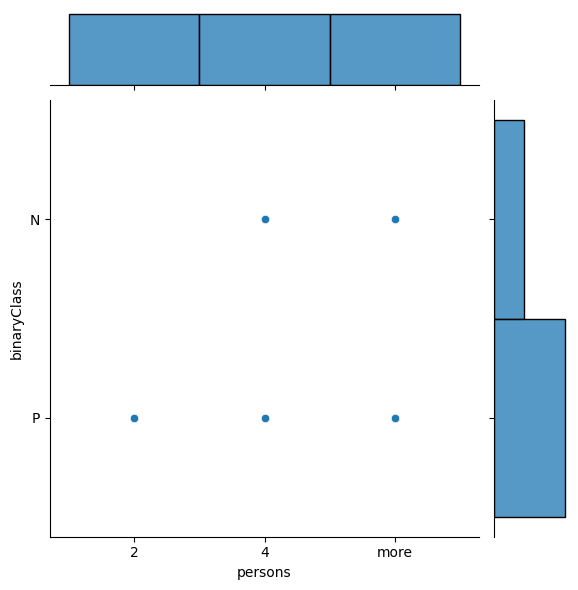

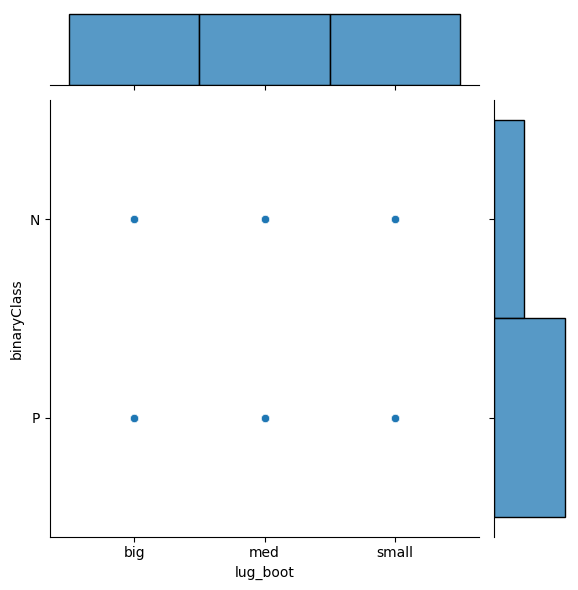

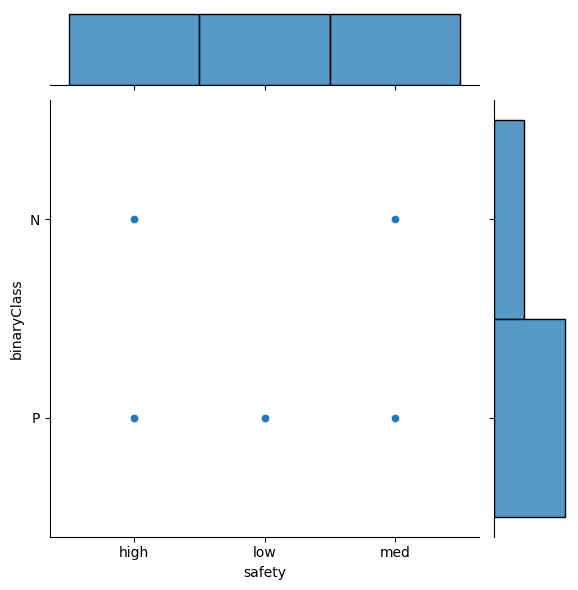

In [16]:
import seaborn as sns
import pandas as pd

# Convert the Bunch object to a Pandas DataFrame
car_df = pd.DataFrame(car_data.data, columns=car_data.feature_names)
car_df['binaryClass'] = car_data.target  # Assuming 'binaryClass' is your target variable name

# Now you can access columns using the DataFrame's 'columns' attribute
l = len(car_df.columns)
for i in range(l -1 ):  # Exclude the target column from the loop
    sns.jointplot(x=car_df.columns[i], y='binaryClass', data=car_df, palette='rainbow')

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convert your car_data Bunch object to a pandas DataFrame
car_df = pd.DataFrame(car_data.data, columns=car_data.feature_names)
car_df['binaryClass'] = car_data.target # If 'target' is the name of the target variable in your Bunch object

# Now you can split the DataFrame into train and test sets
train_data, test_data = train_test_split(car_df, test_size=0.2, random_state=220)

# Accessing the shapes of the train and test data
car_df.shape, train_data.shape, test_data.shape

((1728, 7), (1382, 7), (346, 7))

In [35]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,vhigh,med,2,2,small,high,P
freq,356,355,352,476,478,468,972


In [36]:
# Checking missing values
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [37]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [38]:
train_data['buying'].value_counts()

,count
buying,
vhigh,356
low,349
med,339
high,338


In [39]:
train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


In [40]:
train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


In [41]:
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='buying', ylabel='count'>

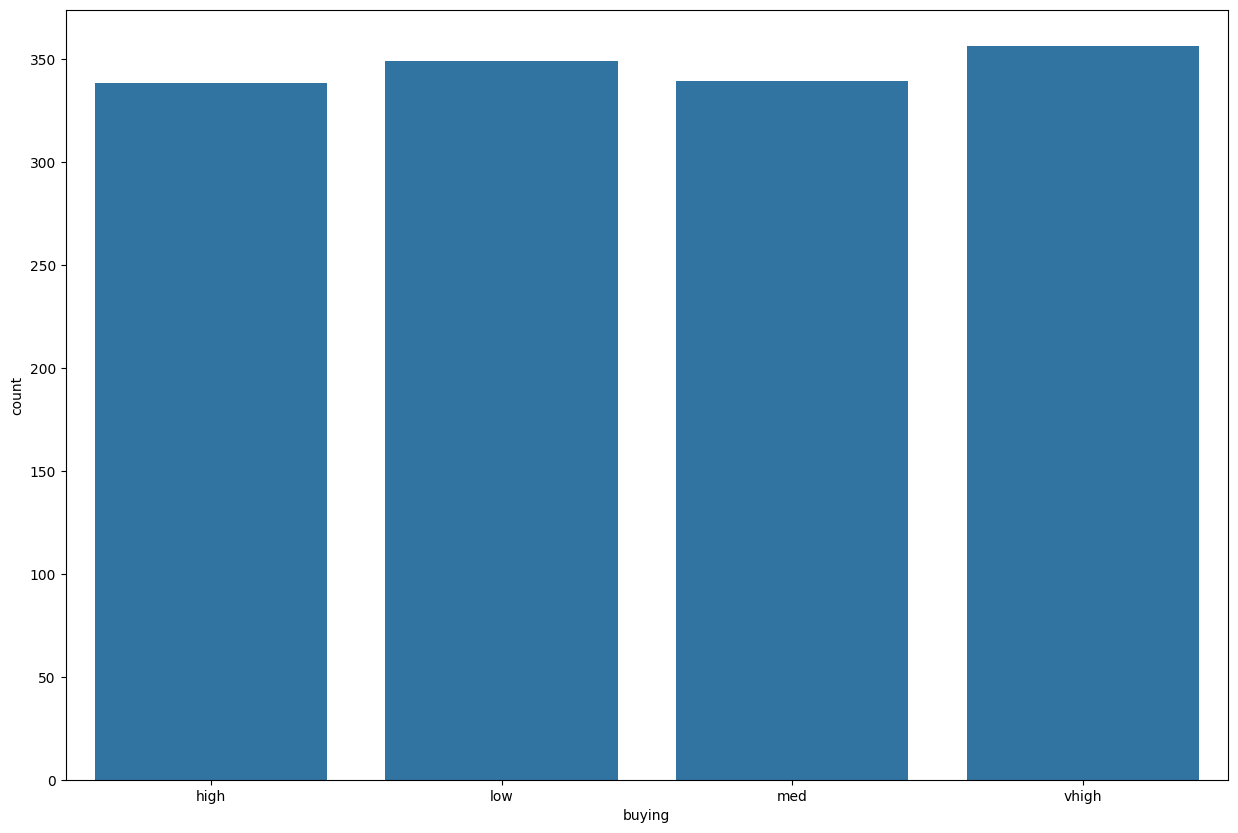

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

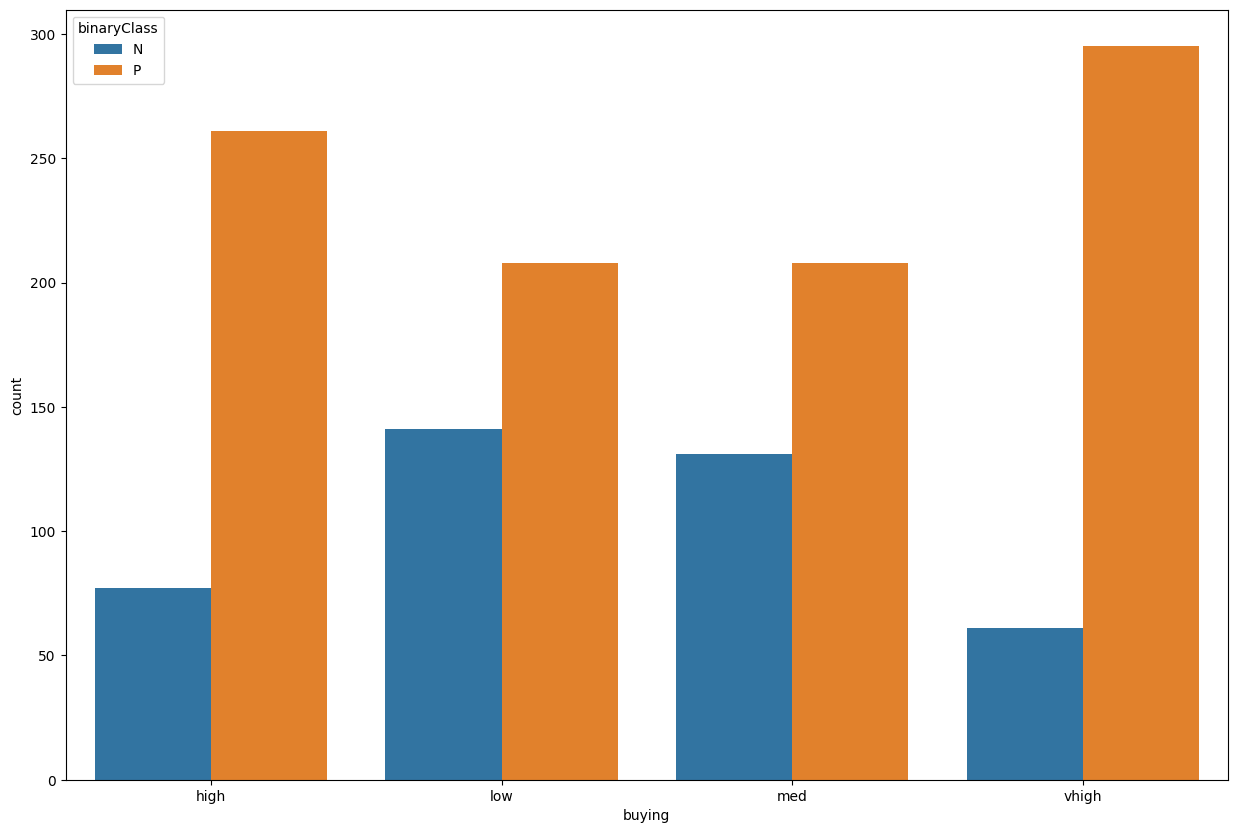

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

In [44]:
train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


<Axes: xlabel='maint', ylabel='count'>

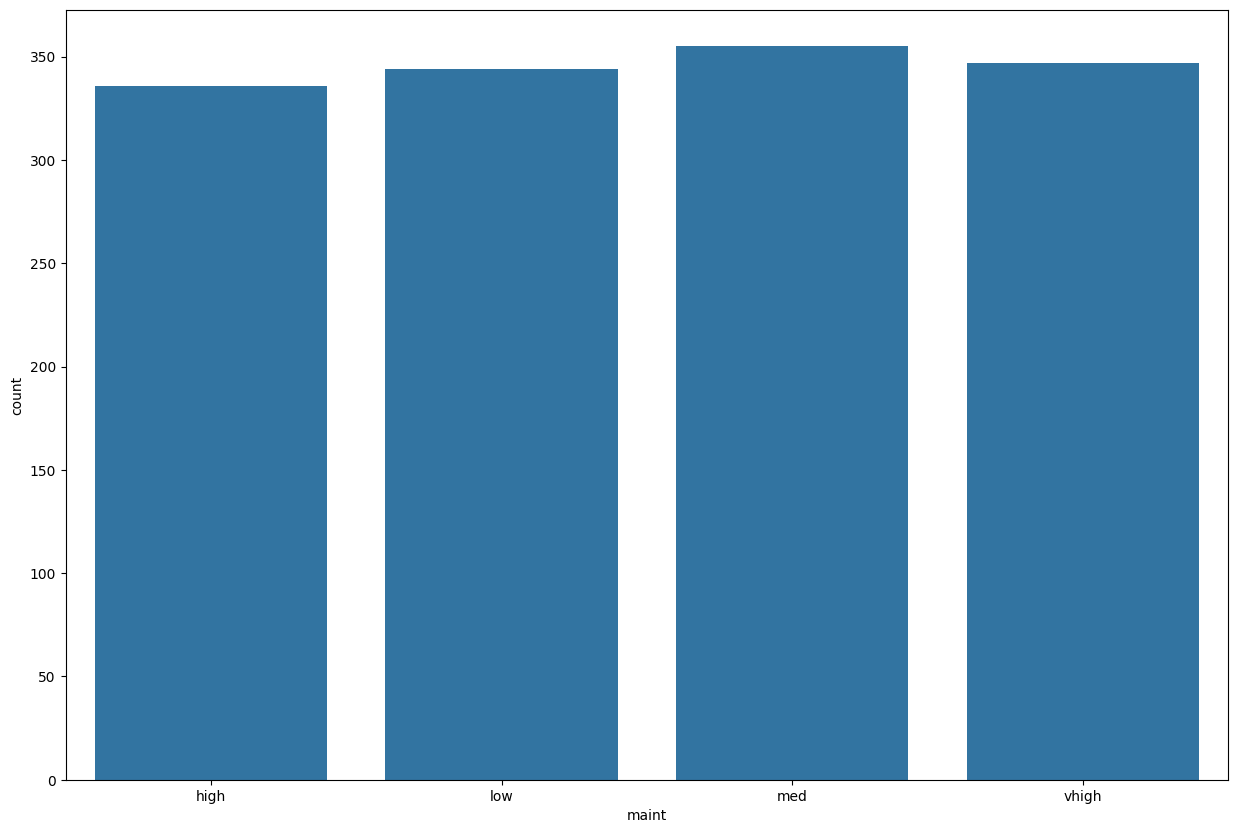

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

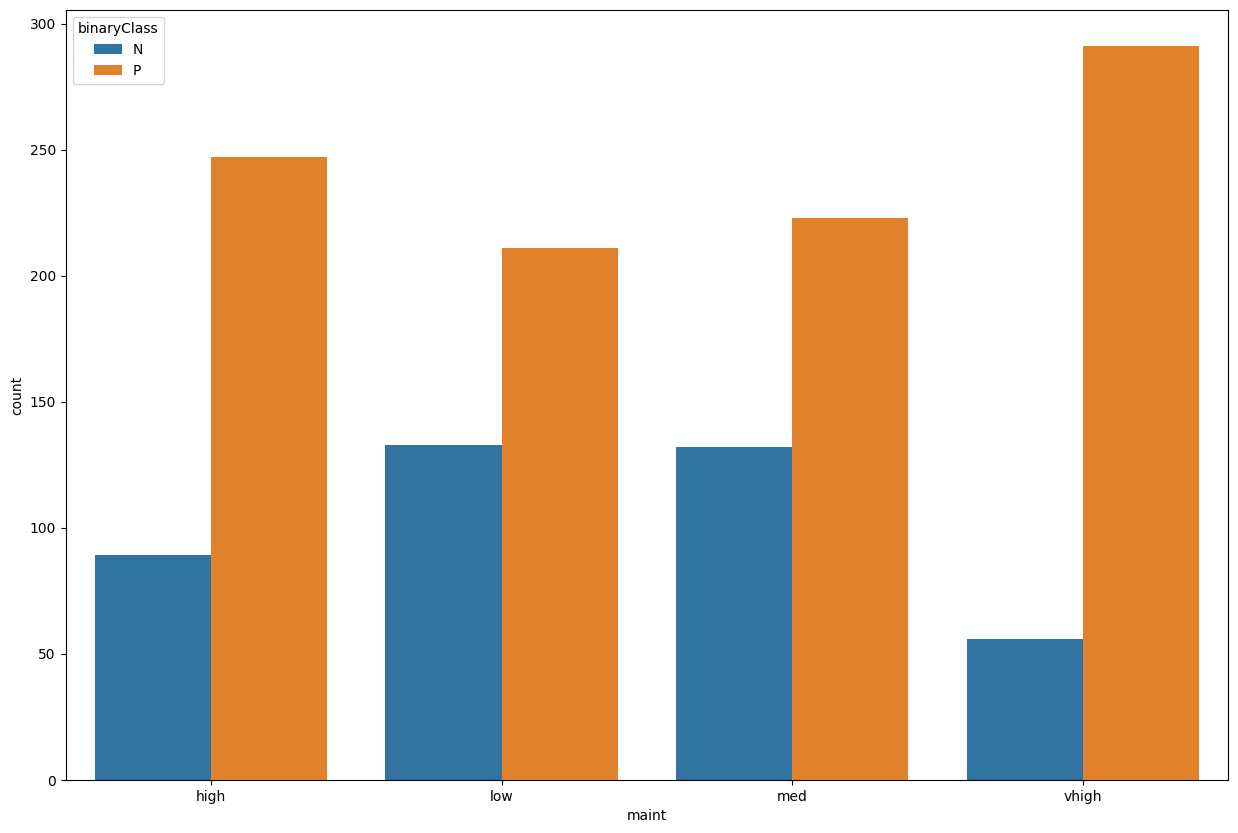

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

In [47]:
train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


<Axes: xlabel='doors', ylabel='count'>

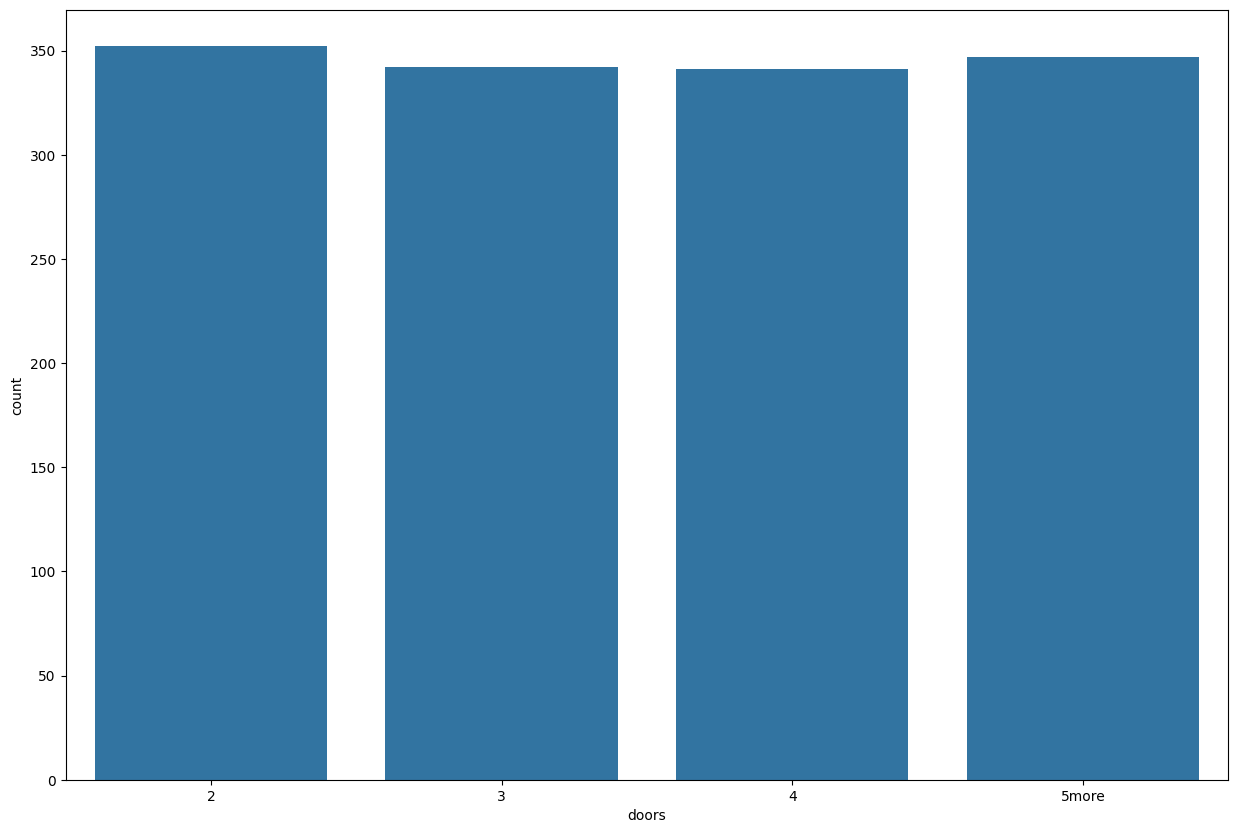

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')

<Axes: xlabel='doors', ylabel='count'>

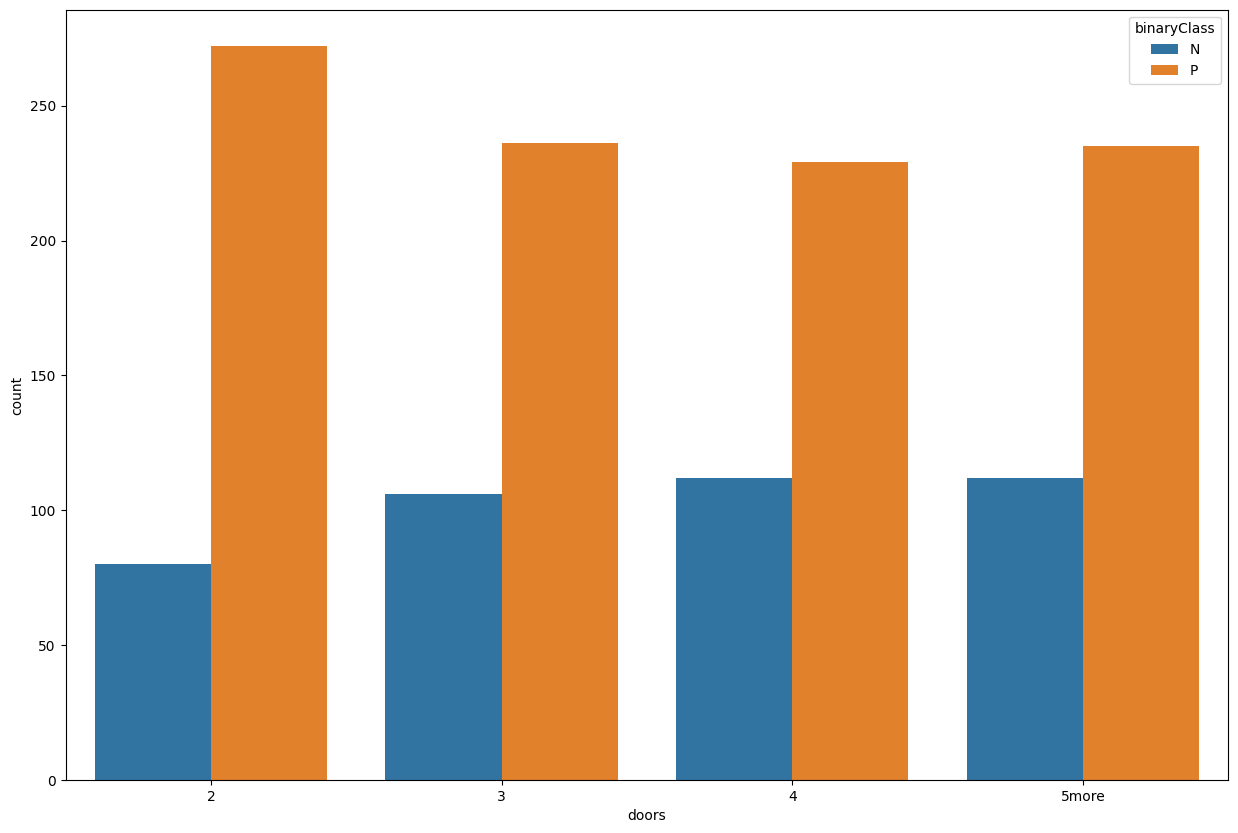

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')

In [50]:
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='persons', ylabel='count'>

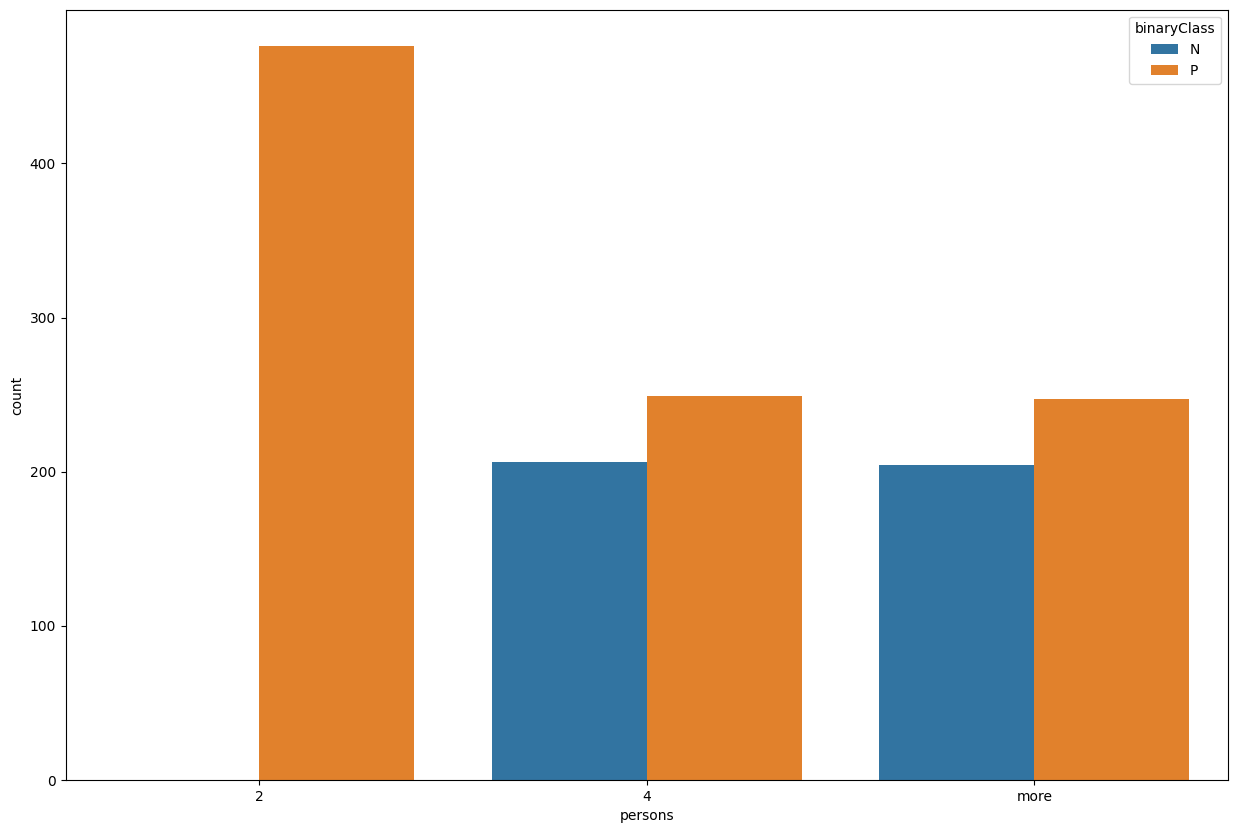

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [52]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
small,478
med,466
big,438


<Axes: xlabel='lug_boot', ylabel='count'>

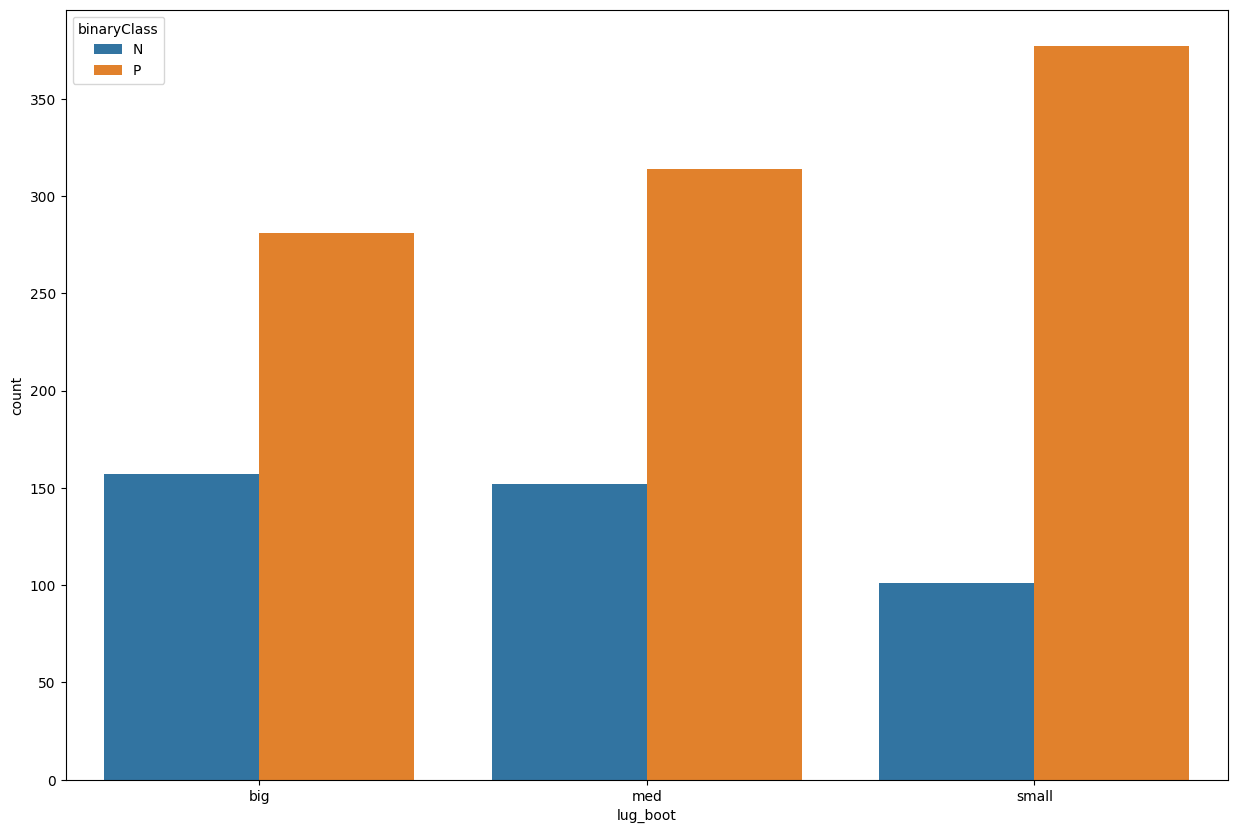

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [54]:
train_data['safety'].value_counts()

,count
safety,
high,468
med,462
low,452


<Axes: xlabel='safety', ylabel='count'>

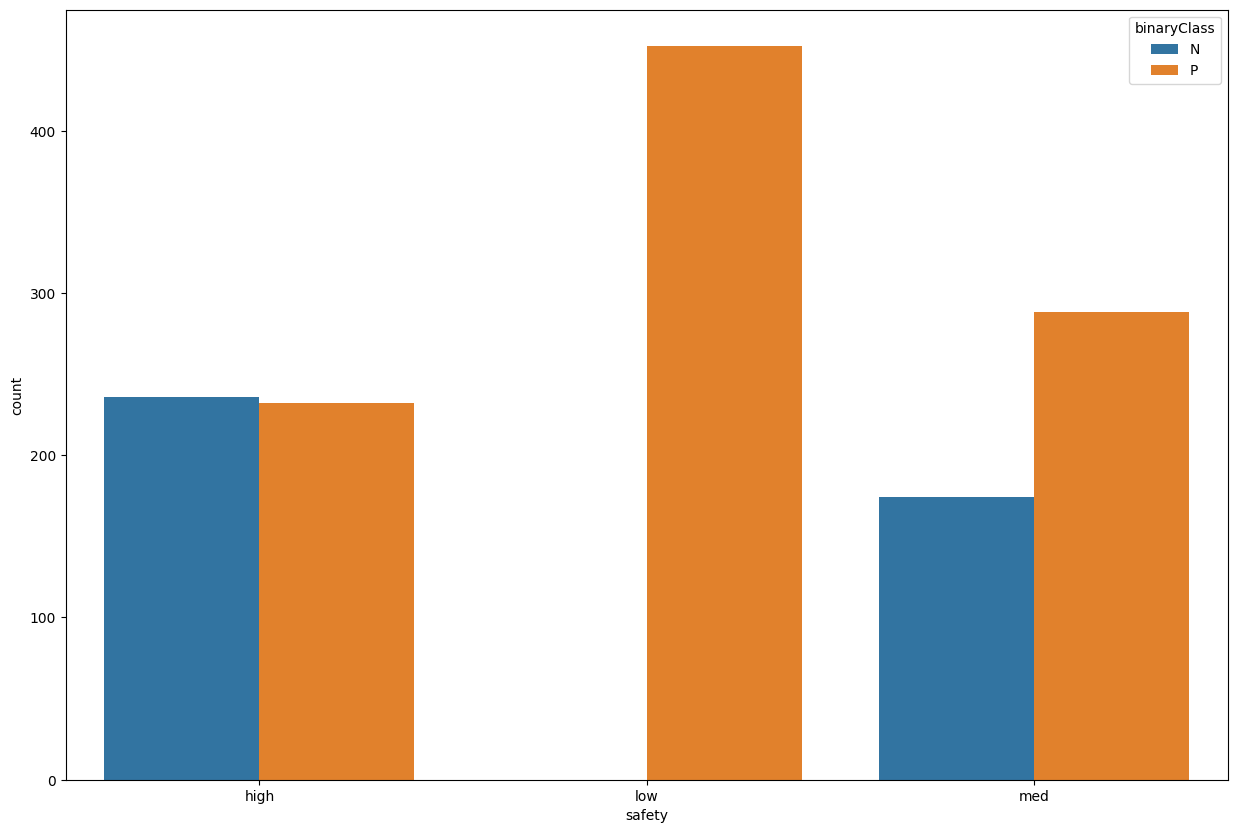

In [55]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [56]:
train_data['binaryClass'].value_counts()

,count
binaryClass,
P,972
N,410


<Axes: xlabel='binaryClass', ylabel='count'>

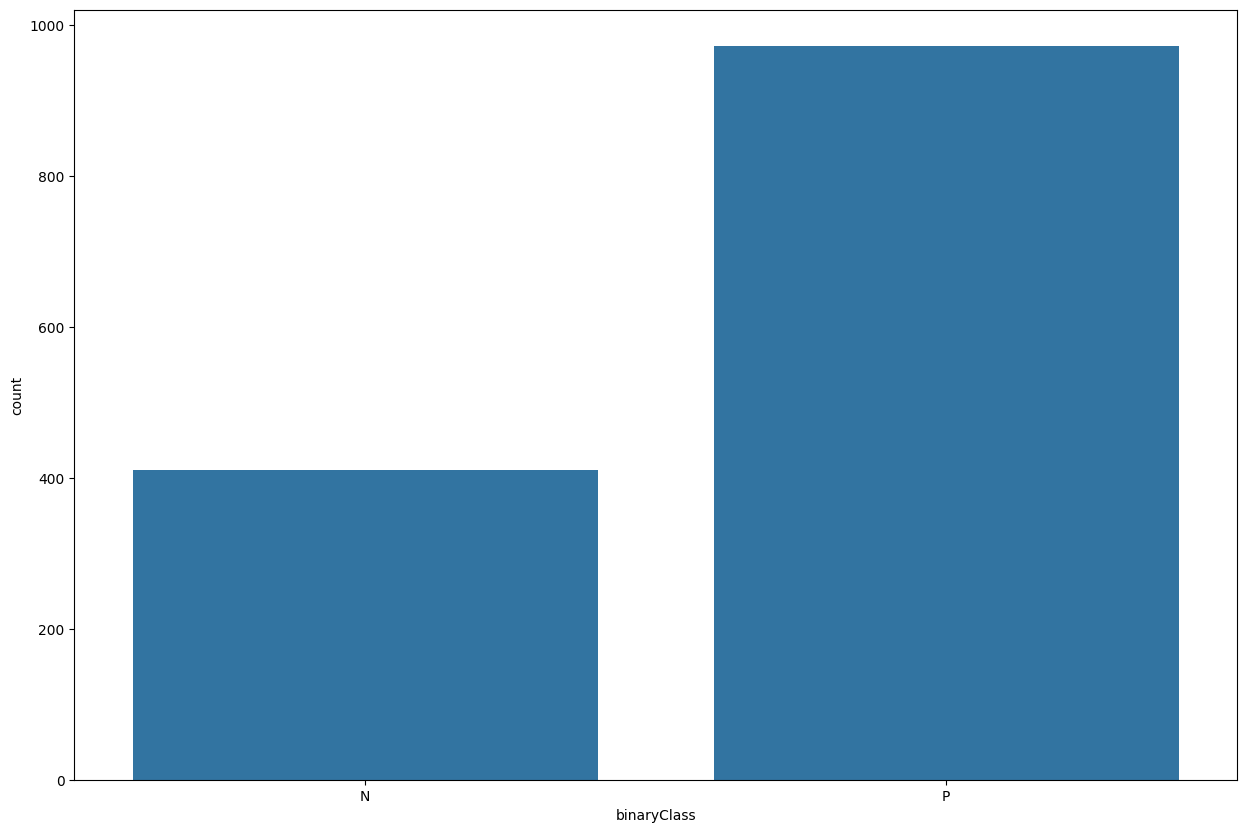

In [57]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')

In [58]:
#data preprocessing
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc', OrdinalEncoder())])
car_train_prepared = pipe.fit_transform(car_train)
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
car_train_prepared.shape, car_labels_prepared.shape

((1382, 6), (1382,))

In [60]:
#5 - Training Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.set_params(class_weight='balanced', criterion='entropy')
tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

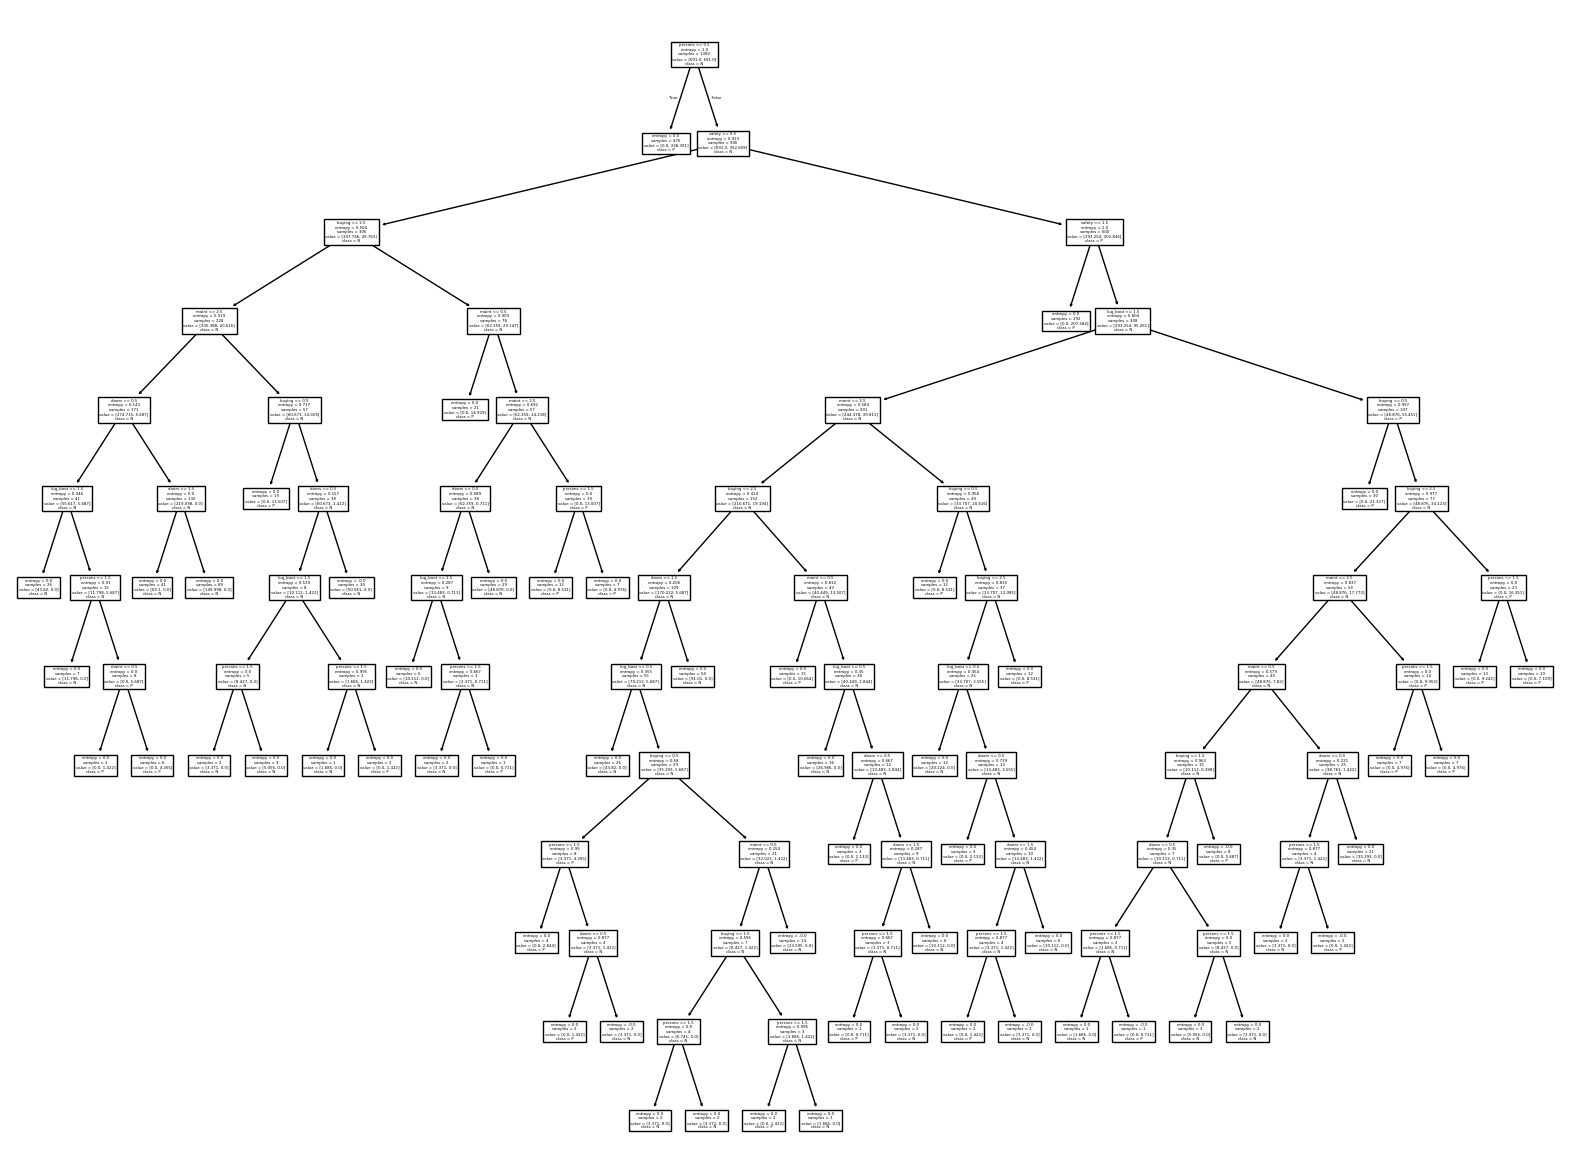

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns,class_names=['N','P']);


In [62]:
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix
preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")

Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

Confusion Matrix:[[410   0]
 [  0 972]]


In [63]:
accuracy_score(car_labels_prepared,preds)

1.0

In [64]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [65]:
# Let's hide warnings returned by grid search
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)
grid_search.fit(car_train_prepared, car_labels_prepared)


Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [66]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [67]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       max_leaf_nodes=5, random_state=42)

In [68]:
tree_best = grid_search.best_estimator_

In [70]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [72]:
import pandas as pd # Import pandas

# Convert car_data to DataFrame
car_df = pd.DataFrame(car_data.data, columns=car_data.feature_names)
car_df['class'] = car_data.target # Add the target variable as a column

# Add the binaryclass column based on your criteria
# Example: Create a binary class based on 'class' values
car_df['binaryclass'] = car_df['class'].apply(lambda x: 1 if x in ['acc', 'good'] else 0)

# Convert back to sklearn.utils.Bunch (Optional)
from sklearn.utils import Bunch
car_data_updated = Bunch(data=car_df.drop(columns=['class', 'binaryclass']).values,
                         target=car_df['binaryclass'].values,
                         feature_names=car_df.drop(columns=['class', 'binaryclass']).columns,
                         target_names=['0', '1']) # Replace with your target names

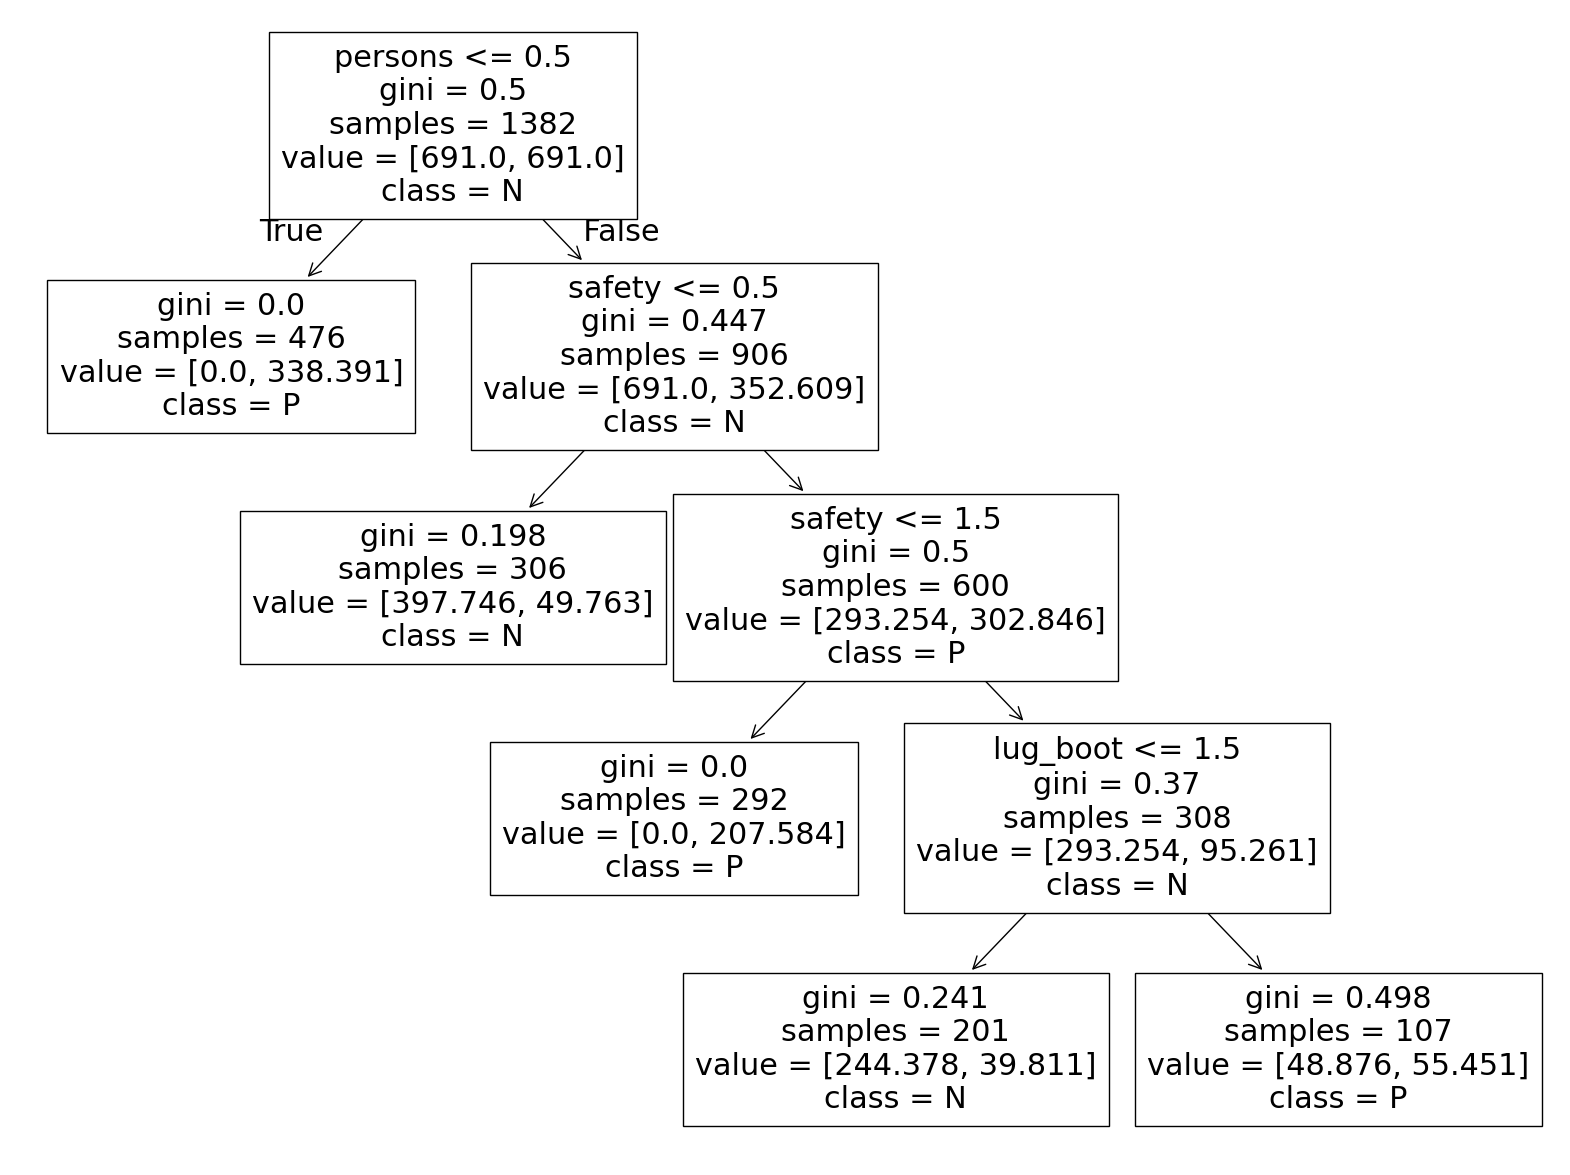

In [73]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);


In [74]:
from sklearn.metrics import accuracy_score
# Assuming `tree_best` is your trained decision tree model
# `car_train_prepared` is your prepared feature set, and `car_labels_prepared` is your target labels
y_pred = tree_best.predict(car_train_prepared)  # Get predictions from the model
accuracy = accuracy_score(car_labels_prepared, y_pred)  # Compare predictions with actual labels
print(f"Accuracy: {accuracy:.4f}")  # Print the accuracy

Accuracy: 0.8878


In [75]:
from sklearn.metrics import confusion_matrix
# Assuming `tree_best` is your trained decision tree model
# `car_train_prepared` is your prepared feature set, and `car_labels_prepared` is your target labels
y_pred = tree_best.predict(car_train_prepared)  # Get predictions from the model
cm = confusion_matrix(car_labels_prepared, y_pred)  # Compute the confusion matrix
print("Confusion Matrix:")
print(cm)  # Print the confusion matrix

Confusion Matrix:
[[381  29]
 [126 846]]


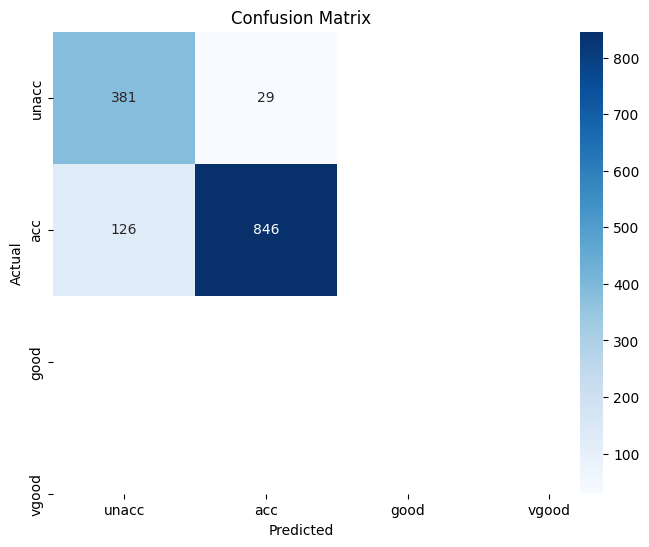

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming `tree_best` is your trained decision tree model
# `car_train_prepared` is your prepared feature set, and `car_labels_prepared` is your target labels
y_pred = tree_best.predict(car_train_prepared)  # Get predictions from the model
cm = confusion_matrix(car_labels_prepared, y_pred)  # Compute the confusion matrix

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['unacc', 'acc', 'good', 'vgood'],  # Replace with your class labels
            yticklabels=['unacc', 'acc', 'good', 'vgood']) # Replace with your class labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [76]:
from sklearn.metrics import classification_report
# Assuming `tree_best` is your trained decision tree model
# `car_train_prepared` is your prepared feature set, and `car_labels_prepared` is your target labels
y_pred = tree_best.predict(car_train_prepared)  # Get predictions from the model
report = classification_report(car_labels_prepared, y_pred)  # Generate the classification report
print("Classification Report:")
print(report)  # Print the classification report

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       410
           1       0.97      0.87      0.92       972

    accuracy                           0.89      1382
   macro avg       0.86      0.90      0.87      1382
weighted avg       0.90      0.89      0.89      1382



In [78]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']
car_test_prepared = pipe.transform(car_test)
car_test_labels_prepared = label_enc.transform(car_test_labels)
y_pred = tree_best.predict(car_test_prepared)  # Make predictions on the test set
accuracy = accuracy_score(car_test_labels_prepared, y_pred)  # Compare predictions to actual labels
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8931


In [81]:
y_pred = tree_best.predict(car_test_prepared)  # Make predictions using the trained model
cm = confusion_matrix(car_test_labels_prepared, y_pred)  # Compute the confusion matrix
print(cm)  # Display the confusion matri

[[102   6]
 [ 31 207]]


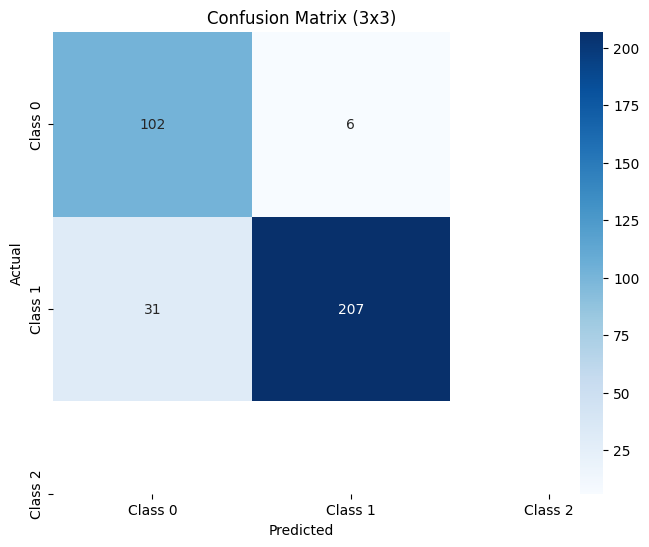

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = tree_best.predict(car_test_prepared)  # Make predictions using the trained model
cm = confusion_matrix(car_test_labels_prepared, y_pred)  # Compute the confusion matrix

# Get the unique class labels from your target variable
class_labels = sorted(list(set(car_test_labels_prepared)))

# Assuming you have 3 classes labeled 0, 1, and 2
# Replace these with your actual class names if different
class_names = ['Class 0', 'Class 1', 'Class 2']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (3x3)")
plt.show()

In [83]:
y_pred = tree_best.predict(car_test_prepared)  # Make predictions on the test set
report = classification_report(car_test_labels_prepared, y_pred)  # Generate the classification report
print(report)  # Print the classification report


              precision    recall  f1-score   support

           0       0.77      0.94      0.85       108
           1       0.97      0.87      0.92       238

    accuracy                           0.89       346
   macro avg       0.87      0.91      0.88       346
weighted avg       0.91      0.89      0.90       346

